In [242]:
class LinearRegression:
    
    def fit(self, X, y, epochs=10, lr=0.1):
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.zeros(X.shape[1])
        self.loss = []
        Xs = X.T.dot(X)
        for i in range(epochs):
            h = X.dot(self.weights)
            self.loss.append(((y - h) ** 2).sum()/len(X))
            H = np.linalg.pinv(2 * Xs)
            gradient = (h - y).dot(X)
            self.weights -= H.dot(gradient)
        return self
    
    def predict(self, X):
        return np.insert(X, 0, 1, axis=1).dot(self.weights)

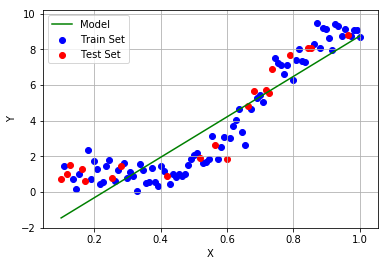

In [243]:
# Generating our data.
import matplotlib.pyplot as plt
X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
Y = np.sin(X) + 0.1 * np.power(X, 2) + 0.5 * np.random.randn(100, 1)
X /= np.max(X)

X = np.hstack((np.ones_like(X), X))

order = np.random.permutation(len(X))
portion = 20

"""
    Split your data into train and test using the order and permutation variable
"""
test_idx = order[:portion]
train_idx = order[portion:]

train_x = X[train_idx]
train_y = Y[train_idx]

test_x = X[test_idx]
test_y = Y[test_idx]

train_y = train_y.reshape(-1,)

model = LinearRegression().fit(train_x, train_y, epochs=6)

plt.plot(X[:,1], model.predict(X), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

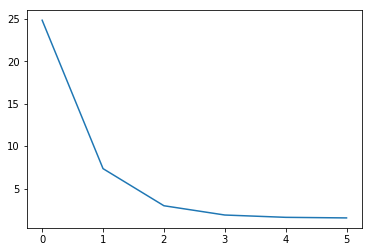

In [244]:
plt.plot(model.loss)

In [245]:
class LogisticRegression:
    
    def fit(self, X, y, epochs=10, lr=0.1):
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.zeros(X.shape[1])
        self.loss = []
        Xs = X.T.dot(X)
        for i in range(epochs):
            h = self.sigmoid(X.dot(self.weights))
            self.loss.append(self.get_loss(h,y))
            invH =  np.linalg.pinv(Xs * h.dot(1-h))
            gradient = (h - y).dot(X)
            self.weights -= invH.dot(gradient)
        return self
    
    def predict(self, X):
        return self.sigmoid(np.insert(X, 0, 1, axis=1).dot(self.weights))
    
    def get_loss(self, h, y):
        return np.abs(y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-1 * z))
    
    def predict_classes(self, X):
        return (self.predict(X) >= 0.5) * 1

In [246]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
X, y = load_iris(return_X_y=True)
clf = LogisticRegression().fit(X, (y !=0 )*1, lr=0.01, epochs=10)
print(clf.predict(X[:2]))
print(clf.predict_classes(X[:2]))
pre = clf.predict_classes(X[:])
accuracy_score((y !=0 )*1, pre)

[0.46901795 0.47771344]
[0 0]


1.0